# Customer Life Time Value Predition

## Following Libraries are used for this project:

In [17]:
import pandas as pd
import numpy as np
import pylab as plt

### Reading the data from CSV

In [51]:
df = pd.read_csv("CLV_Data.csv")

In [52]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,AA10041,California,7901.744238,No,Basic,High School or Below,02/02/11,Unemployed,M,0.0,...,83.0,0.0,5.0,Personal Auto,Personal L3,Offer1,Call Center,1258.327804,SUV,Medsize
1,AA11235,Nevada,2568.843396,No,Basic,Bachelor,1/28/11,Medical Leave,F,11167.0,...,99.0,3.0,1.0,Personal Auto,Personal L3,Offer2,Branch,350.400000,Two-Door Car,Medsize
2,AA16582,Washington,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072.0,...,3.0,0.0,2.0,Personal Auto,Personal L2,Offer1,Agent,511.200000,Four-Door Car,Medsize
3,AA30683,California,6595.101921,No,Premium,Bachelor,1/15/11,Unemployed,M,0.0,...,38.0,2.0,7.0,Personal Auto,Personal L3,Offer1,Web,847.717402,Four-Door Car,Medsize
4,AA34092,California,28799.954150,No,Extended,College,02/11/11,Employed,M,33635.0,...,23.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Web,1152.000000,Luxury SUV,Medsize


In [53]:
df.tail()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,ZZ77357,Nevada,4468.220900,No,Basic,High School or Below,01/09/11,Unemployed,M,0.0,...,61.0,0.0,9.0,Corporate Auto,Corporate L2,Offer1,Agent,468.000000,Two-Door Car,Medsize
9130,ZZ83340,Oregon,5508.315536,No,Basic,Doctor,02/04/11,Employed,F,96021.0,...,30.0,0.0,5.0,Personal Auto,Personal L1,Offer3,Branch,315.004602,Two-Door Car,Medsize
9131,ZZ89380,Oregon,3196.578455,No,Extended,Bachelor,01/10/11,Employed,F,62815.0,...,84.0,0.0,1.0,Special Auto,Special L1,Offer2,Call Center,47.061469,Two-Door Car,Large
9132,ZZ91716,California,3256.766388,No,Extended,Bachelor,1/22/11,Unemployed,F,0.0,...,56.0,0.0,1.0,Personal Auto,Personal L3,Offer2,Web,491.755368,Four-Door Car,Small
9133,ZZ97035,California,20714.940430,No,Extended,College,02/01/11,Unemployed,M,0.0,...,66.0,0.0,2.0,Corporate Auto,Corporate L1,Offer1,Branch,2027.724442,Luxury Car,Small


## Exploring the dataset

### Calculating number of rows and columns

In [54]:
print("Total Number of Columns: ", df.shape[1])
print("Total Number of Rows: ", df.shape[0])

Total Number of Columns:  24
Total Number of Rows:  9134


### Calculating total number null values

In [55]:
print("Total number of Null Values: ", df.isnull().sum().sum())

Total number of Null Values:  925


### Data Types of each column

In [56]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location Code                     object
Marital Status                    object
Monthly Premium Auto             float64
Months Since Last Claim          float64
Months Since Policy Inception    float64
Number of Open Complaints        float64
Number of Policies               float64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

### Basic information of data frame

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9087 non-null   object 
 4   Coverage                       9078 non-null   object 
 5   Education                      9048 non-null   object 
 6   Effective To Date              9065 non-null   object 
 7   EmploymentStatus               9052 non-null   object 
 8   Gender                         9062 non-null   object 
 9   Income                         9081 non-null   float64
 10  Location Code                  9033 non-null   object 
 11  Marital Status                 9062 non-null   object 
 12  Monthly Premium Auto           9081 non-null   f

### Various descriptive statistics on the DataFrame

In [58]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9081.000000,9081.000000,9081.000000,9083.000000,9087.000000,9107.000000,9134.000000
mean,8004.940475,37631.804317,93.218478,15.102962,48.052406,0.385386,2.966509,434.088794
std,6870.967608,30386.530349,34.423683,10.075916,27.880251,0.912190,2.390698,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33881.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62271.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## Handling Null Values

<AxesSubplot:>

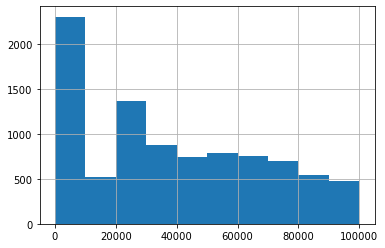

In [59]:
df['Income'].hist()

Since the data is skewed to the right, so we will replace the null values with median.

In [62]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [ ]:
df[''] = df[''].fillna(df[''].)

<AxesSubplot:>

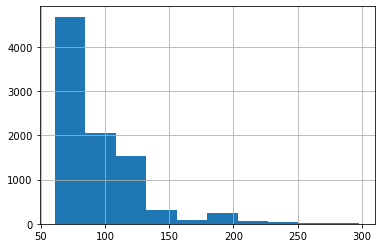

In [31]:
df['Monthly Premium Auto'].hist()

In [63]:
df['Monthly Premium Auto'] = df['Monthly Premium Auto'].fillna(df['Monthly Premium Auto'].median())

<AxesSubplot:>

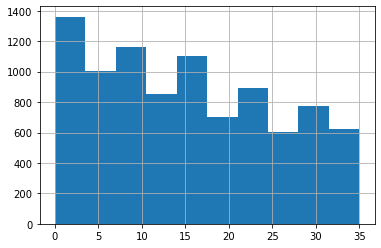

In [32]:
df['Months Since Last Claim'].hist()

In [64]:
df['Months Since Last Claim'] = df['Months Since Last Claim'].fillna(df['Months Since Last Claim'].median())

<AxesSubplot:>

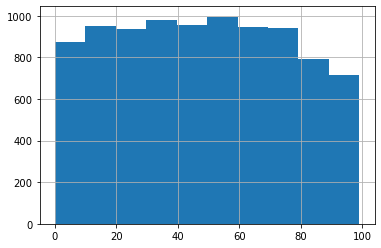

In [33]:
df['Months Since Policy Inception'].hist()

In [65]:
df['Months Since Policy Inception'] = df['Months Since Policy Inception'].fillna(df['Months Since Policy Inception'].mean())

<AxesSubplot:>

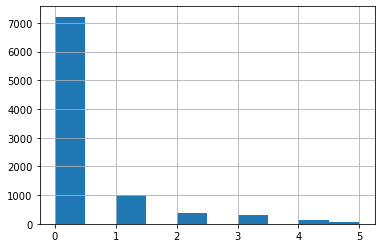

In [35]:
df['Number of Open Complaints'].hist()

In [81]:
df['Number of Open Complaints'] = df['Number of Open Complaints'].fillna(df['Number of Open Complaints'].median())

<AxesSubplot:>

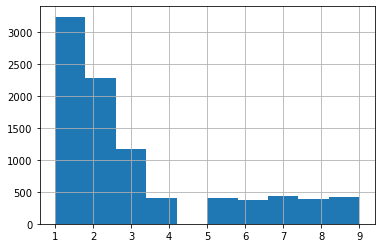

In [36]:
df['Number of Policies'].hist()

In [80]:
df['Number of Policies'] = df['Number of Policies'].fillna(df['Number of Policies'].median())

<AxesSubplot:>

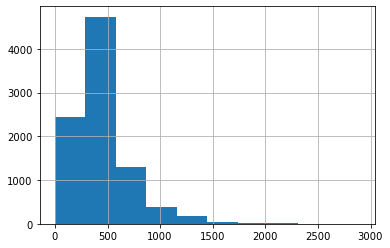

In [38]:
df['Total Claim Amount'].hist()

In [69]:
df['Total Claim Amount'] = df['Total Claim Amount'].fillna(df['Total Claim Amount'].median())

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9087 non-null   object 
 4   Coverage                       9078 non-null   object 
 5   Education                      9048 non-null   object 
 6   Effective To Date              9065 non-null   object 
 7   EmploymentStatus               9052 non-null   object 
 8   Gender                         9062 non-null   object 
 9   Income                         9134 non-null   float64
 10  Location Code                  9033 non-null   object 
 11  Marital Status                 9062 non-null   object 
 12  Monthly Premium Auto           9134 non-null   f

## Handling Missing Values in Categofrical or Ordinal Variables

<AxesSubplot:>

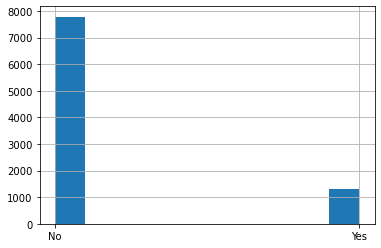

In [39]:
df['Response'].hist()

In [87]:
df['Response'] = df['Response'].fillna(df['Response'].mode()[0])

<AxesSubplot:>

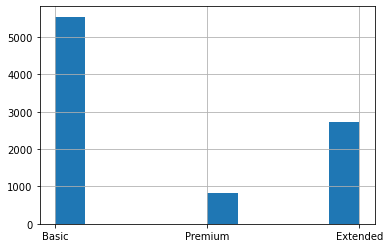

In [40]:
df['Coverage'].hist()

In [88]:
df['Coverage'] = df['Coverage'].fillna(df['Coverage'].mode()[0])

<AxesSubplot:>

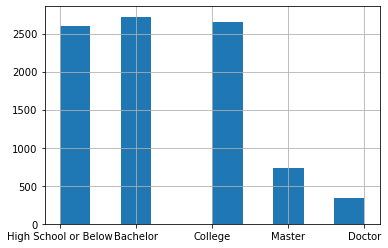

In [41]:
df['Education'].hist()

In [89]:
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])

<AxesSubplot:>

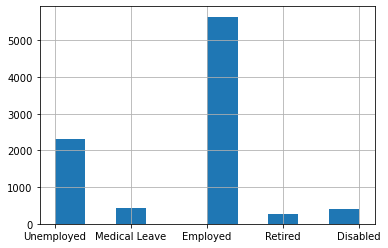

In [43]:
df['EmploymentStatus'].hist()

In [90]:
df['EmploymentStatus'] = df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0])

<AxesSubplot:>

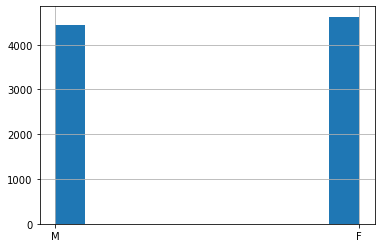

In [44]:
df['Gender'].hist()

In [91]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

<AxesSubplot:>

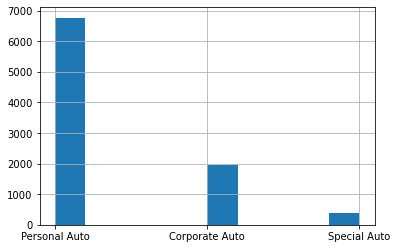

In [45]:
df['Policy Type'].hist()

In [92]:
df['Policy Type'] = df['Policy Type'].fillna(df['Policy Type'].mode()[0])

<AxesSubplot:>

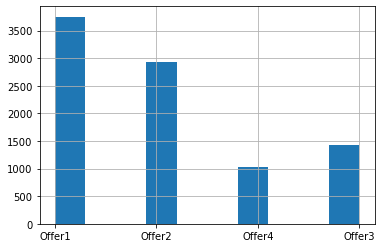

In [46]:
df['Renew Offer Type'].hist()

In [94]:
df['Renew Offer Type'] = df['Renew Offer Type'].fillna(df['Renew Offer Type'].mode()[0])

<AxesSubplot:>

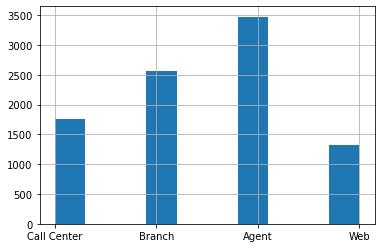

In [47]:
df['Sales Channel'].hist()

In [96]:
df['Sales Channel'] = df['Sales Channel'].fillna(df['Sales Channel'].mode()[0])

<AxesSubplot:>

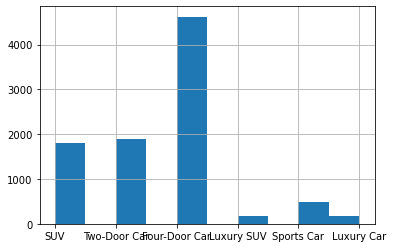

In [48]:
df['Vehicle Class'].hist()

In [97]:
df['Vehicle Class'] = df['Vehicle Class'].fillna(df['Vehicle Class'].mode()[0])

<AxesSubplot:>

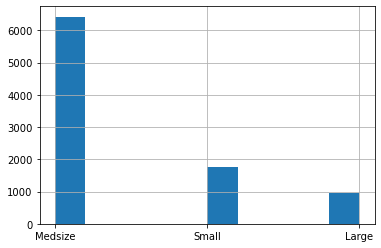

In [49]:
df['Vehicle Size'].hist()

In [98]:
df['Vehicle Size'] = df['Vehicle Size'].fillna(df['Vehicle Size'].mode()[0])

<AxesSubplot:>

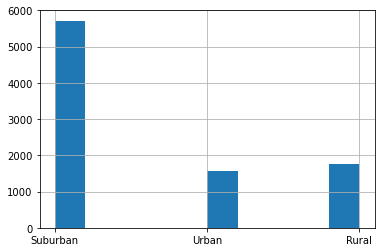

In [100]:
df['Location Code'].hist()

In [122]:
df['Location Code'] = df['Location Code'].fillna(df['Location Code'].mode()[0])

<AxesSubplot:>

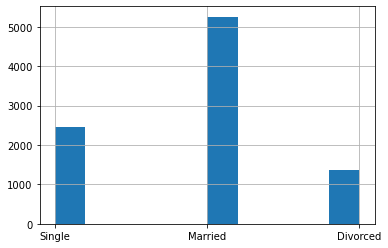

In [102]:
df['Marital Status'].hist()

In [123]:
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])

<AxesSubplot:>

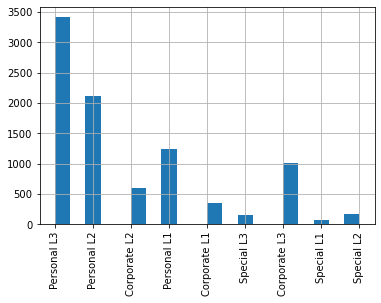

In [121]:
df['Policy'].hist(xrot=90, bins= 20)

In [124]:
df['Policy'] = df['Policy'].fillna(df['Policy'].mode()[0])

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9065 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   float64
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   f

In [ ]:
### Dropping the non important columns

In [ ]:
df = df.drop(['Customer', 'State', 'Effective To Date'], axis=1)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Response                       9134 non-null   object 
 2   Coverage                       9134 non-null   object 
 3   Education                      9134 non-null   object 
 4   EmploymentStatus               9134 non-null   object 
 5   Gender                         9134 non-null   object 
 6   Income                         9134 non-null   float64
 7   Location Code                  9134 non-null   object 
 8   Marital Status                 9134 non-null   object 
 9   Monthly Premium Auto           9134 non-null   float64
 10  Months Since Last Claim        9134 non-null   float64
 11  Months Since Policy Inception  9134 non-null   float64
 12  Number of Open Complaints      9134 non-null   f